# 1 {-}

**Consider the Chutes and Ladders game of our homework 3, problem 2c, in which a player wraps around to the start of the board once the $100$th square is passed. Let $X(t)$ be the position of the player at round $t$.**

# a {-}

**Compute the entropy of $X(t)$ for $t = 1,2,...,200$. Plot the entropy with $t$ and comment on the pattern.**

We let $X(t)$ represent the square the player occupies at time $t$. We have that $t \in \{0, 1, 2, 3, \ldots, 200\}$ and that the state space, $S$, is $S=\{0, 1, 2, 3, 5, \dots, 100\}$. Let us assume $X_0 = 0$, i.e, the player starts with her/his piece off the board.

Then,

$$P(X(t)=i)=\sum_{t_1=0}^{100}\sum_{t_1=0}^{100}\ldots\sum_{t_{t-1}=0}^{100}P(X(0)=0, X(1)=t_1, \ldots, X(t-1)=t_{t-1}, X(t)=i)$$

which by the Markov property is,

$$P(X(t)=i)=\sum_{t_1=0}^{100}\sum_{t_1=0}^{100}\ldots\sum_{t_{t-1}=0}^{100}P(X(t)=i|X(t-1)=t_{t-1})\ldots P(X(1)=t_1|X(0)=0)P(X(0))$$

And as already seen before in class,

$$P(X(t)=i)=\sum_{l}P(X(t)=i|X(0)=l)P(X(0)=l)=P(X(t)=i|X(0)=0)\cdot 1 =P^t_{(0, i)}$$

and so $P(X(t))=P^t_{(0, \cdot)}$

for $t = 1, 2, 3, . . . , 200$, where $P^t$ means matrix multiplying $P$ $t$ times.

The entropy for $X(t)$ for $t=1,2,\ldots, 200$ is $H(X(t))=-\sum_{i=0}^{100}P(X(t)=i)\log(P(X(t)=i))=-P^t_{(0,\cdot)}\cdot \log P^t_{(0,\cdot)}$

Let us use the functions defined in HW 3:

In [1]:
def build_P_v2(chutes_and_ladder_locations):
    """Builds the transition probability matrix for the chutes and ladders game
    
    Args:
        chutes_and_ladder_locations: Dataframe containing the info from 
        the chutes_and_ladder_locations.csv
    
    Returns:
        A numpy array of shape (101, 101)
    
    """
    # helper function
    def shift(array):
        return(np.concatenate((np.array([0]), array[:-1])))
    
    # creating the transition probability 
    # matrix, P, assuming no chutes and ladders
    pdf = np.zeros(101)
    pdf[1:7] = 1/6
    P = pdf.copy()
    
    for _ in range(100):
        pdf = shift(pdf)
        P = np.concatenate((P, pdf))
  
    P = P.reshape(101, 101)
    
    # fixing P for last squares in game
    for i in [95, 96, 97, 98, 99, 100]:
        for j in range(1, i+6-99):
            P[i, j] = 1/6
    
    # fixing P for chutes and ladders
    for i, j in zip(chutes_and_ladder_locations.start, chutes_and_ladder_locations.end):
        P[:,j] += P[:,i]
        P[:,i] = np.zeros(101)
        
    return P

In [2]:
import pandas as pd
import numpy as np
chutes_and_ladder_locations = pd.read_csv('../HW2/chutes_and_ladder_locations.csv')
P = build_P_v2(chutes_and_ladder_locations)

In [3]:
def entropy(t):
    Pt = np.linalg.matrix_power(P, t)
    # we assume log0*0=0, exclude 0s to avoid log error
    ind = np.nonzero(Pt[0,:])[0]
    return - Pt[0,ind].dot(np.log2(Pt[0,ind]))  

In [4]:
entropies = map(entropy, range(0,200))

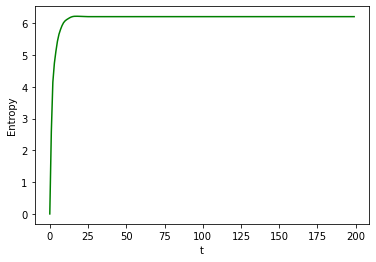

In [5]:
import matplotlib.pyplot as plt
plt.plot(range(0,200), list(entropies), c="green")
plt.xlabel("t")
plt.ylabel("Entropy")
plt.show()

As time increases, entropy increases. Since we can think of entropy as quantifying how much we will be surprised by the outcome of the random variable $X(t)$ on average, the plot is telling us that as the number of rounds increases the greater our surprise will be, on average, by where we land on the board. This makes sense: On the first round, it is pretty clear where we might land on the board (we have $6$ options), but as time goes by (more rounds pass), it is not clear where our piece will be on the board and hence, what options we will have -- hence, the greater entropy.

# b {-}

**Let $\tau = 12345678901234567890$. Compute the relative mutual information of $X (\tau+t)$ with $X (\tau)$ for $t = 0, 5, 10, . . . , 50$. Comment on the pattern.**

The mutual information $I(X(\tau+t);X(\tau))$ was defined as 

$$H(X(\tau+t))-H(X(\tau+t)|X(\tau))$$

and so the relative mutual information is 

$$\frac{H(X(\tau+t))-H(X(\tau+t)|X(\tau))}{H(X(\tau+t))}$$ 

Note that the conditional entropy $H(X(\tau+t)|X(\tau))$ is defined as 

$$H(X(\tau+t)|X(\tau))$$

$$=-\sum_{i=0}^{100}\sum_{j=0}^{100}P(X(\tau+t)=i,X(\tau)=j)\log P(X(\tau+t)=i|X(\tau)=j)$$

$$=-\sum_{i=0}^{100}\sum_{j=0}^{100}P(X(\tau+t)=i|X(\tau)=j)P(X(\tau)=j)\log P(X(\tau+t)=i|X(\tau)=j)$$

Two things to note:

1. $P(X(\tau+t)=i|X(\tau)=j) = P(X(t)=i|X(0)=j)=(P^t)_{(0,i)}$ by definition of transition probability matrix
2. $P(X(\tau)=j)=P^{\tau}_{(0,j)}$ as seen above.

so,

$$=-\sum_{i=0}^{100}\sum_{j=0}^{100}(P^t)_{(0,i)}P^{\tau}_{(0,j)}\log (P^t)_{(0,i)}$$



$$=-\sum_{j=0}^{100}P^{\tau}_{(0,j)}[(P^t)_{(0,\cdot)}\cdot\log (P^t)_{(0,\cdot)}]$$




Approximating $P^{\tau}_{(0,\cdot)}$ with the stationary distribution $\pi$ we have:

$$=-\sum_{j=0}^{100}\pi_j[(P^t)_{(0,\cdot)}\cdot\log (P^t)_{(0,\cdot)}]$$

This is what is implemented in the conditional_entropy(t) function below.


In [50]:
def conditional_entropy(t):
    Pt = np.linalg.matrix_power(P, t)
    # we assume log0*0=0, exclude 0s to avoid log error
    ind = np.nonzero(Pt[0,:])[0]
    return - np.sum(Ptau)*Pt[0,ind].dot(np.log2(Pt[0,ind]))

Let's get the stationary distribution $\pi$.

In [51]:
eigenvalues = np.linalg.eig(P.T)[0]
eigenvectors = np.linalg.eig(P.T)[1]
# Abs gives you mod in python for complex numbers too
i = np.argmax(abs(eigenvalues))
eigenvector_1 = eigenvectors[:,i]
eigenvector_1 = eigenvector_1.real
# probability vector
eigenvector_1 = abs(eigenvector_1/sum(eigenvector_1))

In [52]:
# tau = 12345678901234567890
# Ptau = np.linalg.matrix_power(P, tau)[0,:]
Ptau = eigenvector_1

Now, let's get the relative mutual information:

In [53]:
# get the entropy of the stationary distribution
ind = np.nonzero(Ptau)[0]
entropy_stationary_dist = - Ptau[ind].dot(np.log2(Ptau[ind])) 

In [54]:
def relative_mutual_information(t):
    return(1 - conditional_entropy(t)/entropy_stationary_dist)

In [55]:
relative_mutual_informations = list(map(relative_mutual_information, range(0, 55, 5)))

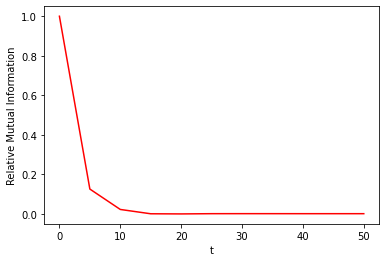

In [56]:
plt.plot(range(0, 55, 5), list(relative_mutual_informations), c="red")
plt.xlabel("t")
plt.ylabel("Relative Mutual Information")
plt.show()

As $t$ increases, the relative mutual information decreases. This makes sense as we can think of mutual information as a measure of the mutual dependence between two random variables, in our case $X(\tau+t)$ and $X(\tau)$. When $t=0$ we have the same random variable so a relative mutual information of $1$ makes sense. As $t$ increases, $X(\tau+t)$ and $X(\tau)$ say less information about each other, primarily due to the markov property.  

# 2 {-}

**This problem and problem 3 below are loosely based on a homework in Eric Xing’s Graphical Models class at Carnegie Mellon: http://www.cs.cmu.edu/~epxing/Class/10708/**

**Restricted Boltzmann machines (RBM) are a type of undirected graphical models in which the vertices are split into two layers. An example of an RBM is given by graph shown in Figure 1 which consists of vertices separated into a bottom layer $V_1, V_2, . . . , V_5$ and top layer $H_1, H_2$. Vertices in the bottom layer represent movies, e.g. Finding Nemo ($V_1$), Avatar ($V_2$), Star Trek ($V_3$), Aladdin ($V_4$), and Frozen ($V_5$). While referring to the nodes as $V_i$, we will also let $V_i$ be random variables taking values $0$ (movie disliked) and $1$ (movie was liked). The two vertices in the top layer represent latent factors (e.g., $H_1$ might be associated with Disney movies, and $H_2$ could represent the adventure genre). And as for the $V_i$, the $H_i$ are random variables taking values $0$ and $1$.**

**The joint distribution of the random variables is given by**

$$P(V=v, H=h)=\alpha e^{E(v,h)}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(1)$$ 

**where** 

$$E(v,h)=\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}v_ih_j+\sum_{i=1}^{5}a_iv_i+\sum_{j=1}^{2}b_jh_j$$

**and $V = (V_1,V_2,...,V_5), v = (v_1,v_2,...,v_5)$ with each $v_i \in \{0, 1 \}$ and similarly for $H, h$. ($E(v, h)$ is referred to as the Energy function in analogy with Boltzmann distributions from statistical physics).**

**The graph of the Figure below and equation (1) define a RBM.**

![Figure 1: Restricted Boltzmann machine (RBM)](RBM_figure.jpeg)

# a {-}

**Show that the RBM defined above is consistent with the network given in the Figure by checking that every pair of vertices not connected by an edge is conditionally independent. (Hint: Use equation (1) to express $P(V_1 = v_1, V_2 = v_2|V_3,V_4,V_5,H_1,H_2)$ and show that the resulting expression splits into a product of two factors dependent on $v_1$ and $v_2$, respectively.)**

Let's show $P(V_1 = v_1, V_2 = v_2|V_3,V_4,V_5,H_1,H_2)=f(v_1)g(v_2)$.

Note,

$$P(V_1 = v_1, V_2 = v_2|V_3,V_4,V_5,H_1,H_2)$$

$$=\frac{P(V_1=v_1, V_2 = v_2, V_3,V_4,V_5,H_1,H_2)}{P(V_3, V_4, V_5, H_1, H_2)}$$

$$=\frac{\alpha e^{\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}v_ih_j+\sum_{i=1}^{5}a_iv_i+\sum_{j=1}^{2}b_jh_j}}{C}$$

$$=\frac{\alpha e^{(v_1\sum_{j=1}^{2}w_{1j}H_j+a_1v_1)+(v_2\sum_{j=1}^{2}w_{2j}H_j+a_2v_2)+\sum_{i=3}^{5}\sum_{j=1}^{2}w_{ij}V_iH_j+\sum_{i=3}^{5}a_iV_i+\sum_{j=1}^{2}b_jH_j}}{C}$$

$$=\frac{\alpha e^{v_1\sum_{j=1}^{2}w_{1j}H_j+a_1v_1}e^{v_2\sum_{j=1}^{2}w_{2j}H_j+a_2v_2}e^{\sum_{i=3}^{5}\sum_{j=1}^{2}w_{ij}V_iH_j+\sum_{i=3}^{5}a_iV_i+\sum_{j=1}^{2}b_jH_j}}{C}$$

$$=\frac{\alpha e^{v_1\sum_{j=1}^{2}w_{1j}H_j+a_1v_1}e^{v_2\sum_{j=1}^{2}w_{2j}H_j+a_2v_2}C'}{C}$$

as the last exponential term does not depend on $v_1, v_2$

$$=\big [\frac{C'\alpha}{C}e^{v_1\sum_{j=1}^{2}w_{1j}H_j+a_1v_1}\big ]\big [e^{v_2\sum_{j=1}^{2}w_{2j}H_j+a_2v_2} \big ]$$

$$=f(v_1)g(v_2)$$


For the remaining pairs $v_i$ that are not connected by an edge such as $V_1, V_3$ or $V_4, V_5$ or $V_2, V_5$, etc, by symmetry, the same argument applies.

To finish showing consistency, we have to show $P(H_1 = h_1, H_2 = h_2|V_1, V_2, V_3,V_4,V_5)=f(h_1)g(h_2)$:


$$P(H_1 = h_1, H_2 = h_2|V_1, V_2, V_3,V_4,V_5)$$

$$=\frac{P(H_1 = h_1, H_2 = h_2|V_1, V_2, V_3,V_4,V_5)}{P(V_1, V_2, V_3, V_4, V_5)}$$

$$=\frac{\alpha e^{\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}v_ih_j+\sum_{i=1}^{5}a_iv_i+\sum_{j=1}^{2}b_jh_j}}{C}$$



$$=\frac{\alpha e^{\sum_{i=1}^{5}w_{ij}V_ih_1 + \sum_{i=1}^{5}w_{ij}V_ih_2 + \sum^{5}_{i=1}a_iV_i + b_1h_1+b_2h_2}}{C}$$

$$=\frac{\alpha e^{(\sum_{i=1}^{5}w_{ij}V_ih_1+ b_1h_1) + (\sum_{i=1}^{5}w_{ij}V_ih_2+b_2h_2) + \sum^{5}_{i=1}a_iV_i}}{C}$$

$$=\frac{\alpha e^{(\sum_{i=1}^{5}w_{ij}V_ih_1+ b_1h_1)}e^{(\sum_{i=1}^{5}w_{ij}V_ih_2+b_2h_2)}C'}{C}$$

$$=\big [\frac{\alpha C'}{C} e^{\sum_{i=1}^{5}w_{ij}V_ih_1+ b_1h_1}\big ] \big [e^{\sum_{i=1}^{5}w_{ij}V_ih_2+b_2h_2}\big ]$$

$$=f(h_1)g(h_2)$$

# b {-}

**Let $V_{−1}$ be all $V_i$ without $V_1$, i.e. $V_{−1} = (V_2,V_3,...,V_5)$. Show that**

$$P(V_1=v_1|V_{-1}, H)=\frac{1}{A+B}$$

**where $A, B$ are the expressions:**

$$A=\exp[\sum_{j=1}^{2}w_{1j}(0-v_1)h_j+a_1(0-v_1)]$$

$$B=\exp[\sum_{j=1}^{2}w_{1j}(1-v_1)h_j+a_1(1-v_1)]$$

**where $\exp(x)=e^x$. Generalize to calculate the conditional distribution of $V_i$ given all other vertices and $H_i$ given all other vertices.**

Let's first show $P(V_1=v_1|V_{-1}, H)=\frac{1}{A+B}$.

$$P(V_1=v_1|V_{-1}, H)$$

$$=\frac{P(V_1=v_1, V_{-1}, H)}{P(V_{-1},H)}$$

$$=\frac{P(V_1=v_1, V_{-1}, H)}{\sum_{v_1=0}^{1}P(V_1=v_1, V_{-1}, H)}$$

$$=\frac{\exp \big [(v_1\sum_{j=1}^{2}w_{1j}H_j+a_1v_1)+\sum_{i=2}^{5}\sum_{j=1}^{2}w_{ij}V_iH_j+\sum_{i=2}^{5}a_iV_i+\sum_{j=1}^{2}b_jH_j \big ]}{\sum_{v_1=0}^{1}\exp \big [(v_1\sum_{j=1}^{2}w_{1j}H_j+a_1v_1)+\sum_{i=2}^{5}\sum_{j=1}^{2}w_{ij}V_iH_j+\sum_{i=2}^{5}a_iV_i+\sum_{j=1}^{2}b_jH_j \big ]}$$

$$=\frac{\exp \big [ v_1\sum_{j=1}^{2}w_{1j}H_j+a_1v_1\big ]}{\sum_{v_1=0}^{1}\exp \big [ v_1\sum_{j=1}^{2}w_{1j}H_j+a_1v_1\big ]}$$

$$=\frac{\exp \big [ v_1\sum_{j=1}^{2}w_{1j}H_j+a_1v_1\big ]}{\exp \big [ \sum_{j=1}^{2}w_{1j}0H_j+a_10\big ]+\exp \big [ \sum_{j=1}^{2}w_{1j}1H_j+a_11\big ]}$$

Now, dividing both numerator and denominator by the value in the numerator, $\exp \big [ v_1\sum_{j=1}^{2}w_{1j}H_j+a_1v_1\big ]$:

$$=\frac{1}{\exp \big [ \sum_{j=1}^{2}w_{1j}(0-v_1)H_j+a_1(0-v_1)\big ]+\exp \big [ \sum_{j=1}^{2}w_{1j}(1-v_1)H_j+a_1(1-v_1)\big ]}$$

$$=\frac{1}{A+B}$$

By symmetry, we can generalize this to all $V_i$ for $i=1,2,3,4,5:$

$$P(V_i=v_i|V_{-i}, H)$$

$$=\frac{1}{\exp \big [ \sum_{j=1}^{2}w_{ij}(0-v_i)H_j+a_i(0-v_i)\big ]+\exp \big [ \sum_{j=1}^{2}w_{ij}(1-v_i)H_j+a_i(1-v_i)\big ]}$$

Similarly, by symmetry, we can generalize this to $H_j$ for $j=1,2$:

$$P(H_j=h_j|H_{-j}, V)$$

$$=\frac{1}{\exp \big [ \sum_{i=1}^{5}w_{ij}(0-h_j)V_i+b_j(0-h_j)\big ]+\exp \big [ \sum_{i=1}^{5}w_{ij}(1-h_j)V_i+b_j(1-h_j)\big ]}$$

# c {-}

**For the rest of this problem, assume $a_i = 0, b_i = 0$ and $w_{ij}$ is given by the following matrix:**

$$W=\begin{pmatrix}
2 & -3 \\
2 & -3 \\
-2 & 3 \\
-2 & -2 \\
0 & 2
\end{pmatrix}$$

**Use your result from (b) to write a Gibbs sampler for the RBM.**

In [13]:
import numpy as np
W = np.array([[2,-3], [2, -3], [-2, 3], [-2, -2], [0,2]])
W

array([[ 2, -3],
       [ 2, -3],
       [-2,  3],
       [-2, -2],
       [ 0,  2]])

Each sample $\omega^{(i+1)}$ is obtained from $\omega^{(i)}$ after obtaining each $V$ and each $H$ in a sequential manner using the respective marginal distributions (instead of considering each $\omega^{(i+1)}$ to be from changing only one coordinate of $\omega^{(i)}$). This will speed up convergence to the stationary distribution and decrease relaxation time.

In other words:

Given $\omega^{(i)}=(V_1^{(i)}, V_2^{(i)}, V_3^{(i)}, V_4^{(i)}, V_5^{(i)}, H_1^{(i)}, H_2^{(i)})$

- Sample $\hat{V_1}^{(i+1)}$ from $P(V_1|V_2^{(i)}, V_3^{(i)}, V_4^{(i)}, V_5^{(i)}, H_1^{(i)}, H_2^{(i)})$

- Sample $\hat{V_2}^{(i+1)}$ from $P(V_2|V_1^{(i+1)}, V_3^{(i)}, V_4^{(i)}, V_5^{(i)}, H_1^{(i)}, H_2^{(i)})$

- Sample $\hat{V_3}^{(i+1)}$ from $P(V_3|V_1^{(i+1)}, V_2^{(i+1)}, V_4^{(i)}, V_5^{(i)}, H_1^{(i)}, H_2^{(i)})$

- Sample $\hat{V_4}^{(i+1)}$ from $P(V_4|V_1^{(i+1)}, V_2^{(i+1)}, V_3^{(i+1)}, V_5^{(i)}, H_1^{(i)}, H_2^{(i)})$

- Sample $\hat{V_5}^{(i+1)}$ from $P(V_5|V_1^{(i+1)}, V_2^{(i+1)}, V_3^{(i+1)}, V_4^{(i+1)}, H_1^{(i)}, H_2^{(i)})$

- Sample $\hat{H_1}^{(i+1)}$ from $P(H_1|V_1^{(i+1)}, V_2^{(i+1)}, V_3^{(i+1)}, V_4^{(i+1)}, V_5^{(i+1)}, H_2^{(i)})$

- Sample $\hat{H_2}^{(i+1)}$ from $P(H_2|V_1^{(i+1)}, V_2^{(i+1)}, V_3^{(i+1)}, V_4^{(i+1)}, V_5^{(i+1)}, H_1^{(i+1)})$

And so, $\omega^{(i+1)}=(V_1^{(i+1)}, V_2^{(i+1)}, V_3^{(i+1)}, V_4^{(i+1)}, V_5^{(i+1)}, H_1^{(i+1)}, H_2^{(i+1)})$

In [14]:
def V_marginal(i, omega, W):
    """Marginal for each Vi, i=1,2,3,4,5"""
    p0 = 1 / (1 + np.exp(W[i,:].dot(omega[-2:])))
    p1 = 1 / (1 + np.exp(-W[i,:].dot(omega[-2:])))
    return [p0, p1]

def H_marginal(j, omega, W):
    """Marginal for each Hi, i=1,2"""
    p0 = 1 / (1 + np.exp(W[:,j].dot(omega[:-2])))
    p1 = 1 / (1 + np.exp(-W[:,j].dot(omega[:-2])))
    return [p0, p1]

def Gibbs_Sampler(W, omega, N, sample_hidden=True, sample_observed=True):
    """sampling the joint prob of (V, H) via Gibbs Sampling"""
    samples = [omega]
    for n in range(0, N):
        if sample_observed:
            for i in range(0, 5):
                omega[i] = np.random.choice([0, 1], p=V_marginal(i, omega, W))
        if sample_hidden:
            for j in range(5, 7):
                omega[j] = np.random.choice([0, 1], p=H_marginal(j-5, omega, W))
        samples.append(omega.copy())
    return np.array(samples)

# d {-}

**Calculate the relaxation time of your Gibbs sampler exactly. Remember, the Gibbs sampler is a special case of a MH sampler. Here you have $2^7$ possible states for your MH Markov chain and you can specify the transition probabilities, so you can calculate the transition probability matrix.**

$P(\omega^{(i)}|\omega^{(i-1)})$ can be obtained from multiplying the probabilites listed in the bullet points above. 

The below function gets $P(\omega^{(i)}|\omega^{(i-1)})$:

In [15]:
def calculate_transition_prob(w, wprime):
    prob = 1
    for i in range(0, 5):
        A_V = np.exp(np.multiply(W[i,:].dot(w[-2:]), 0-wprime[i]))
        B_V = np.exp(np.multiply(W[i,:].dot(w[-2:]), 1-wprime[i]))
        probs_V = 1 / (A_V + B_V)
        prob = prob * probs_V

    for j in range(5, 7):
        A_H = np.exp(np.multiply(W.T[5-j].dot(wprime[:-2]), 0-wprime[j]))
        B_H = np.exp(np.multiply(W.T[5-j].dot(wprime[:-2]), 1-wprime[j]))
        probs_H = 1 / (A_H + B_H)
        prob = prob * probs_H

    return prob

Let's define all possible states, $2^7$:

In [16]:
from itertools import product

states = np.array(list(product(range(2), repeat=7)))
transition_prob_kernel = np.empty((2**7, 2**7))

Lastly, let's get the transition probability matrix:

In [17]:
for i, w in enumerate(states):
    for j, wprime in enumerate(states):
        transition_prob_kernel[i, j] = calculate_transition_prob(w, wprime)

In [18]:
# checking that we have a transition probability kernel
# rows must sum to 1
transition_prob_kernel.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
eigenvalues = np.linalg.eig(transition_prob_kernel)[0]
eigenvectors = np.linalg.eig(transition_prob_kernel)[1]

In [20]:
eigenvalue_2 = sorted(abs(eigenvalues), reverse=True)[1]
rt = 1/(1-eigenvalue_2)
rt

6.499766333682572

The relaxation time for the gibbs sampler I defined is roughly 6.5.

# e {-}

**Use your Gibbs sampler to determine the distribution of $H_1$ and $H_2$ given that a user (a) likes the movies corresponding to $V_1$ and $V_2$ but dislikes the others and (b) likes all the movies.**


a) Likes movies $V_1, V_2$, i.e., $V_1=V_2=1$ and dislikes movies $V_3,V_4, V_5$, i.e., $V_3=V_4=V_5=0$

In [21]:
N = 10**6
# fixing the first 5 entries of omega to what is described in a) which corresponds to the observed nodes V
# initializing the hidden nodes to 0
omega_start = np.array([1,1,0,0,0,0,0])
samples = Gibbs_Sampler(W, omega_start, N, sample_hidden=True, sample_observed=False)

In [22]:
hidden_samples = np.array(samples)[:,-2:]
# burn in time
hidden_samples_wBurnIn = hidden_samples[int(0.3*N):,]

$P(H_1=0, H_2=0|V)$:

In [23]:
p00 = len(hidden_samples_wBurnIn[(hidden_samples_wBurnIn[:,0] == 0) & (hidden_samples_wBurnIn[:,1] == 0)])/len(hidden_samples_wBurnIn)

In [24]:
p00

0.017817117404117993

$P(H_1=0, H_2=1|V)$

In [25]:
p01 = len(hidden_samples_wBurnIn[(hidden_samples_wBurnIn[:,0] == 0) & (hidden_samples_wBurnIn[:,1] == 1)])/len(hidden_samples_wBurnIn)

In [26]:
p01

4.1428512244982505e-05

$P(H_1=1, H_2=0|V)$

In [27]:
p10 = len(hidden_samples_wBurnIn[(hidden_samples_wBurnIn[:,0] == 1) & (hidden_samples_wBurnIn[:,1] == 0)])/len(hidden_samples_wBurnIn)

In [28]:
p10

0.9797371718040403

$P(H_1=1, H_2=1|V)$

In [29]:
p11 = len(hidden_samples_wBurnIn[(hidden_samples_wBurnIn[:,0] == 1) & (hidden_samples_wBurnIn[:,1] == 1)])/len(hidden_samples_wBurnIn)

In [30]:
p11

0.0024042822795967435

In [31]:
import pandas as pd
df = pd.DataFrame([[p00, p10, p00+p10], [p01, p11, p01+p11], [p00+p01, p10+p11, p00+p10+p01+p11]])
df.columns =['H1 = 0', 'H1 = 1', 'Marginal H2'] 
df.index = ['H2 = 0', 'H2 = 1', 'Marginal H1'] 
df

,H1 = 0,H1 = 1,Marginal H2
H2 = 0,0.017817,0.979737,0.997554
H2 = 1,0.000041,0.002404,0.002446
Marginal H1,0.017859,0.982141,1.000000


b) Like movies $V_1, V_2, V_3,V_4, V_5$, i.e., $V_1=V_2=V_3=V_4=V_5=1$

In [32]:
# fixing the first 5 entries of omega to what is described in b) which corresponds to the observed nodes V
# initializing the hidden nodes to 0 
omega_start = np.array([1,1,1,1,1,0,0])
samples = Gibbs_Sampler(W, omega_start, N, sample_hidden=True, sample_observed=False)

In [33]:
hidden_samples = np.array(samples)[:,-2:]
# burn in time
hidden_samples_wBurnIn = hidden_samples[int(0.3*N):,]

$P(H_1=0, H_2=0|V)$:

In [34]:
p00 = len(hidden_samples_wBurnIn[(hidden_samples_wBurnIn[:,0] == 0) & (hidden_samples_wBurnIn[:,1] == 0)])/len(hidden_samples_wBurnIn)

In [35]:
p00

0.47646503362138054

$P(H_1=0, H_2=1|V)$

In [36]:
p01 = len(hidden_samples_wBurnIn[(hidden_samples_wBurnIn[:,0] == 0) & (hidden_samples_wBurnIn[:,1] == 1)])/len(hidden_samples_wBurnIn)

In [37]:
p01

0.023848537359232345

$P(H_1=1, H_2=0|V)$

In [38]:
p10 = len(hidden_samples_wBurnIn[(hidden_samples_wBurnIn[:,0] == 1) & (hidden_samples_wBurnIn[:,1] == 0)])/len(hidden_samples_wBurnIn)

In [39]:
p10

0.4761193198295431

$P(H_1=1, H_2=1|V)$

In [40]:
p11 = len(hidden_samples_wBurnIn[(hidden_samples_wBurnIn[:,0] == 1) & (hidden_samples_wBurnIn[:,1] == 1)])/len(hidden_samples_wBurnIn)

In [41]:
p11

0.023567109189844015

In [42]:
df = pd.DataFrame([[p00, p10, p00+p10], [p01, p11, p01+p11], [p00+p01, p10+p11, p00+p10+p01+p11]])
df.columns =['H1 = 0', 'H1 = 1', 'Marginal H2'] 
df.index = ['H2 = 0', 'H2 = 1', 'Marginal H1'] 
df

,H1 = 0,H1 = 1,Marginal H2
H2 = 0,0.476465,0.476119,0.952584
H2 = 1,0.023849,0.023567,0.047416
Marginal H1,0.500314,0.499686,1.000000


# 3 {-}

**Now we will consider the RBM of problem 2 again, but this time focusing on inferring the parameters. We will assume throughout that $a_i =0$ and $b_i =0$. Let $\theta=(w_{11},w_{12},w_{21},w_{22},...,w_{51},w_{52})$**

# a {-}

**Using the values of the parameters given in part (c) of problem 2, generate $N = 100$ independent samples of the random variables $(V, H)$ in the RBM. That is, you will sample $(V,H)~ 100$ times, so that each $(V,H)$ sample is independent of the others.**

In [43]:
indep_samples = np.empty((100, 7))
for i in range(0, 100):
    omega_start = np.random.randint(2, size=7)
    sample = Gibbs_Sampler(W, omega_start, 10**4, sample_hidden=True, sample_observed=True)[-1]
    indep_samples[i, :] = sample

# b {-}

**Let $\hat{V}^{(k)}$ and $\hat{H}^{(k)}$ for $k = 1,2,...,100$ be the iid samples you generated in (a). Let $l(\theta)$ be the log-likelihood of this data. Show**

$$l(\theta)=N\log(\alpha(\theta))+\sum_{k=1}^{100}\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i^{(k)}\hat{H}_j^{(k)}$$

**and that**

$$\frac{\partial l}{\partial w_{mn}}(\theta)=-NE_{\theta}[V_mH_n]+\sum_{k=1}^{N}\hat{V}_m^{(k)}\hat{H}_n^{(k)}$$

**where $E_{\theta}[V_mH_n]$ is the expected value of $V_mH_n$ under the parameter $\theta$**

From the prompt, we know that $P(\hat{V}, \hat{H}; \theta)=\alpha e^{\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i\hat{H}_j}$ where $\theta=(w_{11},w_{12},w_{21},w_{22},...,w_{51},w_{52})$

Let $\hat{V}^{(k)}$ and $\hat{H}^{(k)}$ for $k = 1,2,...,100$ be iid. Then the likelihood of this data is,

$$L(\theta)$$

$$=\prod_{k=1}^{100}P(\hat{V}, \hat{H}; \theta)$$

$$=\prod_{k=1}^{100}\alpha e^{\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i^{(k)}\hat{H}_j^{(k)}}$$

$$=\alpha^{100} e^{\sum_{k=1}^{100}\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i^{(k)}\hat{H}_j^{(k)}}$$

And so the log-likelihood of the data is,

$$l(\theta)=\log L(\theta)$$

$$\log \alpha^{100} e^{\sum_{k=1}^{100}\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i^{(k)}\hat{H}_j^{(k)}}$$

$$=100\log \alpha + \sum_{k=1}^{100}\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i^{(k)}\hat{H}_j^{(k)}$$

Now, by noting that $\alpha$ must be such that 

$$\sum_{\hat{V_1}=0}^{1}\sum_{\hat{V_1}=0}^{1}\ldots \sum_{\hat{V_5}=0}^{1}\sum_{\hat{H_1}=0}^{1}\sum_{\hat{H_2}=0}^{1}\alpha e^{\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i\hat{H}_j}=1$$




$$\implies \alpha = \frac{1}{\sum_{\hat{V_1}=0}^{1}\sum_{\hat{V_1}=0}^{1}\ldots \sum_{\hat{V_5}=0}^{1}\sum_{\hat{H_1}=0}^{1}\sum_{\hat{H_2}=0}^{1}e^{\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i\hat{H}_j}}$$

and so $\alpha$ is indeed a function of $\theta$. Therefore, we have,

$$l(\theta)$$

$$=100\log \alpha(\theta) + \sum_{k=1}^{100}\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i^{(k)}\hat{H}_j^{(k)}$$

where $100=N$


Now, let's derive 

$$\frac{\partial l}{\partial w_{mn}}(\theta)$$

$$=\frac{\partial}{\partial w_{mn}}(100\log \alpha(\theta) + \sum_{k=1}^{100}\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i^{(k)}\hat{H}_j^{(k)})
$$

$$=100\frac{\partial}{\partial w_{mn}}\log \alpha(\theta) + \frac{\partial}{\partial w_{mn}}\sum_{k=1}^{100}\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i^{(k)}\hat{H}_j^{(k)}$$

Let's first derive $\frac{\partial}{\partial w_{mn}}\log \alpha(\theta)$:

First note,

$$\log \alpha(\theta)$$
$$=\log\frac{1}{\sum_{\hat{V_1}=0}^{1}\sum_{\hat{V_1}=0}^{1}\ldots \sum_{\hat{V_5}=0}^{1}\sum_{\hat{H_1}=0}^{1}\sum_{\hat{H_2}=0}^{1}e^{\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i\hat{H}_j}}$$
$$=-\log \sum_{\hat{V_1}=0}^{1}\sum_{\hat{V_1}=0}^{1}\ldots \sum_{\hat{V_5}=0}^{1}\sum_{\hat{H_1}=0}^{1}\sum_{\hat{H_2}=0}^{1}e^{\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i\hat{H}_j}$$

So,

$$\frac{\partial}{\partial w_{mn}}\log \alpha(\theta)$$

$$=\frac{\partial}{\partial w_{mn}}(-\log \sum_{\hat{V_1}=0}^{1}\sum_{\hat{V_1}=0}^{1}\ldots \sum_{\hat{V_5}=0}^{1}\sum_{\hat{H_1}=0}^{1}\sum_{\hat{H_2}=0}^{1}e^{\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i\hat{H}_j})$$

$$=- \frac{\frac{\partial}{\partial w_{mn}}( \sum_{\hat{V_1}=0}^{1}\sum_{\hat{V_1}=0}^{1}\ldots \sum_{\hat{V_5}=0}^{1}\sum_{\hat{H_1}=0}^{1}\sum_{\hat{H_2}=0}^{1}e^{\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i\hat{H}_j})}{\sum_{\hat{V_1}=0}^{1}\sum_{\hat{V_1}=0}^{1}\ldots \sum_{\hat{V_5}=0}^{1}\sum_{\hat{H_1}=0}^{1}\sum_{\hat{H_2}=0}^{1}e^{\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i\hat{H}_j}} $$

$$=-\frac{\sum_{\hat{V_1}=0}^{1}\sum_{\hat{V_1}=0}^{1}\ldots \sum_{\hat{V_5}=0}^{1}\sum_{\hat{H_1}=0}^{1}\sum_{\hat{H_2}=0}^{1}\hat{V}_m\hat{H}_ne^{\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i\hat{H}_j})}{\sum_{\hat{V_1}=0}^{1}\sum_{\hat{V_1}=0}^{1}\ldots \sum_{\hat{V_5}=0}^{1}\sum_{\hat{H_1}=0}^{1}\sum_{\hat{H_2}=0}^{1}e^{\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i\hat{H}_j}}$$

$$=-\sum_{\hat{V_1}=0}^{1}\sum_{\hat{V_1}=0}^{1}\ldots \sum_{\hat{V_5}=0}^{1}\sum_{\hat{H_1}=0}^{1}\sum_{\hat{H_2}=0}^{1}\hat{V}_m\hat{H}_nP(\hat{V}, \hat{H}; \theta)$$

$$=-E_{\theta}[V_mH_n]$$

Lastly,

$$\frac{\partial}{\partial w_{mn}}\sum_{k=1}^{100}\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i^{(k)}\hat{H}_j^{(k)}$$

$$=\sum_{k=1}^{100}\hat{V}_m^{(k)}\hat{H}_n^{(k)}$$

And so putting everything together:

$$\frac{\partial l}{\partial w_{mn}}(\theta)$$

$$=100\frac{\partial}{\partial w_{mn}}\log \alpha(\theta) + \frac{\partial}{\partial w_{mn}}\sum_{k=1}^{100}\sum_{i=1}^{5}\sum_{j=1}^{2}w_{ij}\hat{V}_i^{(k)}\hat{H}_j^{(k)}$$

$$=-100E_{\theta}[V_mH_n] + \sum_{k=1}^{100}\hat{V}_m^{(k)}\hat{H}_n^{(k)}$$

where $100=N$

# c {-}

**Use a steepest ascent iteration**

$$\theta^{(i+1)}=\theta^{(i)}+\epsilon\nabla l(\theta^{(i)})$$

**to find the MLE for $\theta$. Make $\epsilon$ small so backtracking will not be needed. At each iteration use your Gibbs sampler to calculate the expression $E_{\theta}[V_mH_n]$. Note you can run your Gibbs sampler once to generate this expected value for all pairs $m, n$. Also, at each iteration $i$ of the steepest ascent algorithm, save the last state of your Gibbs sampler and use it as the initial state in iteration $i+1$ of the steepest ascent algorithm. This will greatly reduce the number of time steps you need to run the Gibbs sampler. Compare your MLE to the actual value of $\theta$.**

The function below estimates $E_{\theta}[V_mH_n]$ when passing samples generated via Gibbs Sampling:

In [44]:
def expected_value_estimate(samples, m, n):
    return np.mean(np.sum(samples[:,m]*samples[:,n]))

The function below calculates the gradient as specified in b) and in the prompt for c):

In [45]:
def get_gradient(omega_start, W):
    """
    Args: 
        omega_start: last state of Gibbs sampler from previous iteration
        W: current values of parameters
    Returns:
        gradient: value of gradient
        samples[-1]: last state of Gibbs sampler   
    """
    samples = Gibbs_Sampler(W, omega_start, 10**3, sample_hidden=True, sample_observed=True)
    gradient = np.empty((10))
    i = 0
    for m in range(0,5):
        for n in range(0,2):
            gradient[i] = -100*expected_value_estimate(samples, m, n) + np.sum(indep_samples[:,m]*indep_samples[:,n])
            i = i + 1
    return gradient, samples[-1]

In [46]:
def steepest_ascent(N, theta, omega_start, eps=0.000001):
    for n in tqdm(range(0, N)):
        gradient, omega_start = get_gradient(omega_start, theta.reshape(5,2)) 
        theta = theta + eps*gradient
    return theta

In [47]:
# warm start for the value of omega_start to pass to the first iteration of gradient ascent
theta_start = np.random.randint(2, size=10)
omega_start = Gibbs_Sampler(theta_start.reshape(5,2), np.random.randint(2, size=7), 10**5, sample_hidden=True, sample_observed=True)[-1]

In [48]:
from tqdm import tqdm # timer in secs
estimated_theta = steepest_ascent(10**2, theta_start, omega_start)
estimated_theta.reshape(5,2)

100%|██████████| 100/100 [00:23<00:00,  4.30it/s]


array([[-4.0237, -1.8394],
       [-1.8394, -4.1094],
       [-1.0547, -2.1016],
       [-1.8794, -1.8962],
       [-1.1629, -1.1858]])

In [49]:
W

array([[ 2, -3],
       [ 2, -3],
       [-2,  3],
       [-2, -2],
       [ 0,  2]])

The estimates from steepest differ from the parameters as can be seen above. We should try different combinations of $\epsilon$ and the starting point to get better results (we might be stuck at a local optimum). Similarly, we may need more data as $100$ samples might not be enough. 

# 4 {-}

**Suppose that you know a certain stationary, mean zero Gaussian process $X(t)$ has autocorrelation given by $r(t) = \sigma^2 \exp[−\lambda t]$ and that you know $\sigma^2$ and $\lambda$. An experiment provides a collection of samples $(t_i, x_i)$ for $i = 1, 2, . . . , N$. Describe how you would compute a p-value for the hypothesis that the $x_i$ are the values of $X(t)$ at the times $t_i$ from a single sample of the Gaussian process. No need to code anything up, just explain how you would compute a p-value and why your approach makes sense.**

Let $X \in R^n$ be the stationary, mean zero Gaussian process specified above. Then $X \sim N(0, \Sigma)$ where $\Sigma_{ij}=\sigma^2\exp[-\lambda|i-j|]$.

Let $\Sigma = AA^T$ be the cholesky decomposition of $\Sigma$. Then $Y=A^TX\sim N(0,I)$ from previous HWs. I.e., we now have that $Y_i$ for $i=1,2,...,n$ are iid random variables each distributed as $N(0,1)$.

And from here we can apply the Kolmogorov Smirnoff statistical test. The null hypothesis assumes no difference between the observed ($Y_i$) and theoretical ($N(0,1)$) distribution and the value of the test statistic D is calculated as the supremum of the set of distances $D_n=\sup_x |F_n(x)-F(x)|$. To get the p-value we can pass our $Y_i$ to a python or R Kolmogorov Smirnoff function (in Python scipy.stats.kstest returns the p-value).

